# White House Project
First, import the necessary packages as well as the data. Get an idea of the structure of the data, the range of values and their distribution.

In [2]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the data into a pandas dataframe and print the shape of the dataframe
white_house_data = pd.read_csv("2015_white_house.csv")
print(white_house_data.shape)

# Display the first 5 rows
white_house_data.head()

(474, 5)


,Name,Status,Salary,Pay Basis,Position Title
0,"Abdullah, Hasan A.",Detailee,105960,Per Annum,POLICY ADVISOR
1,"Abraham, Sabey M.",Employee,55000,Per Annum,ENERGY AND ENVIRONMENT DIRECTOR FOR PRESIDENTI...
2,"Abraham, Yohannes A.",Employee,121200,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND CHIEF O...
3,"Abramson, Jerry E.",Employee,155035,Per Annum,DEPUTY ASSISTANT TO THE PRESIDENT AND DIRECTOR...
4,"Adler, Caroline E.",Employee,114000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...


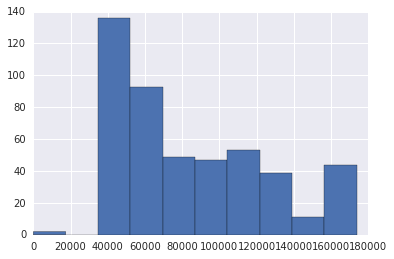

In [3]:
# Visually check the distribution of the Salary column
white_house_data["Salary"].hist()

Questions:
1. How does the length of an employee's title correlate with their salary?
2. How much does the White House pay in total salary?
3. Who are the highest and lowest paid staffers?
4. What words are the most common in titles?
5. How much does the word 'Senior' add to one's salary expectation?
6. Who earns more; detailees or employees?
7. Which position has the highest average salary?

### Question 1: How does the length of an employee's title correlate with their salary?

In [4]:
# Find the length of each employee's title
title_length = white_house_data["Position Title"].str.len()

In [5]:
# Add the column to the dataframe
white_house_data["Title Length"] = title_length

In [6]:
# Select Salary and Title Length columns
salary_length = white_house_data[["Salary", "Title Length"]]

In [7]:
# Perform a pairwise correlation on the columns
salary_length.corr()

,Salary,Title Length
Salary,1.000000,0.532837
Title Length,0.532837,1.000000


/opt/ds/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


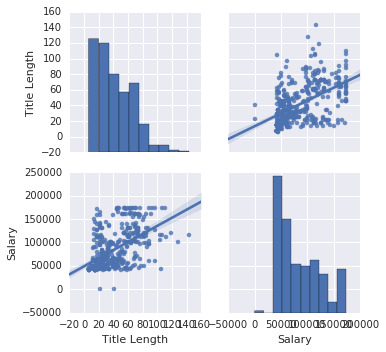

In [32]:
# Visually explore the correlation
sns.pairplot(white_house_data[["Title Length", "Salary"]], kind="reg")

**Answer 1:** There is a correlation of ~0.53 between the length of an employee's title and their salary.

*Question for later: what is the expected salary increase for an extra letter in one's title? (Linear regression)*

### Question 2: How much does the White House pay in total salary?

First, we need to check that all salaries are on a yearly basis.

In [9]:
# Display the unique values for Pay Basis
print(white_house_data["Pay Basis"].unique())

['Per Annum']


All salaries in the data are on a yearly basis, meaning we can simply sum the whole column.

In [10]:
# Sum the value for "Salary" over the whole dataframe
total_salary = white_house_data["Salary"].sum()

# Display the result
print(total_salary)

40225595


**Answer 2:** The White House pays $40,225,595 per year in salary.

### Question 3: Who are the highest and lowest paid staffers?

We want a list of the 10 highest and 10 lowest paid staffers, along with their salary and title.

In [11]:
# Sort the dataframe by salary
white_house_salary_sorted = white_house_data.sort_values(by="Salary")

In [12]:
# Find the length of the dataframe
df_length = white_house_salary_sorted.shape[0]
# Find 10 highest paid staffers
ten_highest = white_house_salary_sorted.iloc[df_length-11:df_length-1,:]

# Display the result
ten_highest

,Name,Status,Salary,Pay Basis,Position Title,Title Length
210,"Kale, Katy A.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT FOR MANAGEMENT AND ...,60
201,"Johnson, Broderick D.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND CABINET SECRETARY,48
200,"Jarrett, Valerie B.",Employee,173922,Per Annum,SENIOR ADVISOR AND ASSISTANT TO THE PRESIDENT ...,97
403,"Simas, David M.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE...,88
130,"Fallon, Katherine B.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE...,76
426,"Tchen, Christina M.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND CHIEF OF STAFF ...,63
121,"Eggleston, Warren N.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND COUNSEL TO THE ...,55
117,"Earnest, Joshua R.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND PRESS SECRETARY,46
52,"Breckenridge, Anita J.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND DEPUTY CHIEF OF...,67
70,"Canegallo, Kristie A.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND DEPUTY CHIEF OF...,71


In [13]:
# Find the 10 lowest paid staffers
ten_lowest = white_house_salary_sorted.iloc[:9,:]

# Display the result
ten_lowest

,Name,Status,Salary,Pay Basis,Position Title,Title Length
243,"Leary, Kimberlyn R.",Employee,0,Per Annum,ADVISOR TO THE COUNCIL ON WOMEN AND GIRLS,41
326,"Park, Todd Y.",Employee,0,Per Annum,ADVISOR FOR TECHNOLOGY,22
235,"Lamm, Garrett C.",Employee,41000,Per Annum,ANALYST,7
85,"Conn-Powers, Alyse C.",Employee,42000,Per Annum,ANALYST,7
91,"Cutillo, Andrew D.",Employee,42000,Per Annum,ANALYST,7
100,"Dessources, Kalisha",Employee,42000,Per Annum,STAFF ASSISTANT,15
281,"McKay, Caroline M.",Employee,42000,Per Annum,STAFF ASSISTANT,15
108,"Donohue, Kelsey A.",Employee,42000,Per Annum,RESEARCH ASSOCIATE,18
385,"Sarsour, Nora N.",Employee,42000,Per Annum,STAFF ASSISTANT,15


In [33]:
# Remove the rows with a salary of 0
ten_lowest = white_house_salary_sorted[white_house_salary_sorted["Salary"] != 0].iloc[:9,:]

# Display the result
ten_lowest

,Name,Status,Salary,Pay Basis,Position Title,Title Length
235,"Lamm, Garrett C.",Employee,41000,Per Annum,ANALYST,7
85,"Conn-Powers, Alyse C.",Employee,42000,Per Annum,ANALYST,7
91,"Cutillo, Andrew D.",Employee,42000,Per Annum,ANALYST,7
100,"Dessources, Kalisha",Employee,42000,Per Annum,STAFF ASSISTANT,15
281,"McKay, Caroline M.",Employee,42000,Per Annum,STAFF ASSISTANT,15
108,"Donohue, Kelsey A.",Employee,42000,Per Annum,RESEARCH ASSOCIATE,18
385,"Sarsour, Nora N.",Employee,42000,Per Annum,STAFF ASSISTANT,15
305,"Munro, Marea L.",Employee,42000,Per Annum,RECORDS MANAGEMENT ANALYST,26
45,"Bowerman, Heidi L.",Employee,42000,Per Annum,ANALYST,7


Display the distribution of the Salary column, histogram with 50 bins. Create this one manually.

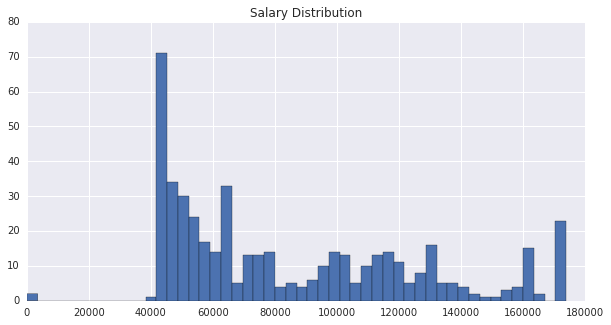

In [51]:
# Create a Figure instance
fig = plt.figure(figsize=(10,5))
# Create a subplot
ax = fig.add_subplot(1,1,1)

# Shortcut variables
salary = white_house_data["Salary"]

# Set the title
ax.set_title("Salary Distribution")

# Generate the histogram
ax.hist(salary, bins=50)

plt.show()

### Question 4: What words are the most common in titles?

First we need the list of all the words in all the titles.

In [15]:
# Find all words contained in all the titles
split_titles = []
for title in white_house_data["Position Title"]:
    split_titles.append(title.split())

Issue: split_titles is a list of lists. We need to flatten it so we can convert it to a Series.

In [16]:
# Import the itertools package
import itertools

# Flatten the list
split_titles_flattened = list(itertools.chain.from_iterable(split_titles))

In [17]:
# Convert to a series
titles_series = pd.Series(data=split_titles_flattened)

We want to remove stopwords from the Series. Ideally using a full list of words; for now we'll do it manually.

In [18]:
# Create a list of stopwords
stop = ["THE", "TO", "AND", "OF", "FOR"]

# Replace the stopwords with '' in the Series
titles_series_stop = titles_series.replace(to_replace=stop, value='')

# Remove '' from the Series
titles_series_final = titles_series_stop[titles_series_stop != '']

Finally, we can count the frequency of each item in the Series

In [52]:
# Count the frequency of each item in the Series
word_counts = titles_series_final.value_counts()

# Show the first 5 words
word_counts.head()

ASSISTANT    215
DIRECTOR     146
PRESIDENT    135
SPECIAL      102
DEPUTY        86
dtype: int64

**Visualisation:** create a bar plot of the 10 most common words and their frequency

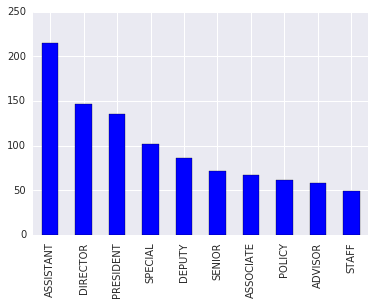

In [59]:
# Plot the 10 most common words and their frequency
word_counts.head(10).plot(kind="bar")

**Answer 4:** The most common words in titles are ASSISTANT, DIRECTOR, PRESIDENT, SPECIAL and DEPUTY.

### Question 5: How much does the word 'Senior' add to one's salary expectation?

Easy way: compute the average salary for all positions w/o Senior, compute for positions w/ Senior and compare.

We'll define a function which takes a string and boolean as arguments. The function should return the average salary for the employees whose titles contain the string (if boolean=True, default value).

In [20]:
# Define the average_salary_for_group function
def avg_salary_for_group(string, contains=True):
    # Find the set of employees whose titles contain, or don't contain the string
    employee_subset = white_house_data[white_house_data["Position Title"].str.contains(string) == contains]
    # Compute the average salary for these employees
    average_salary = employee_subset["Salary"].mean()
    # Return the average salary
    return average_salary

In [21]:
# Find the average salary for Senior employees
avg_senior_salary = avg_salary_for_group("SENIOR")
print(avg_senior_salary)

92146.0714286


In [22]:
# Find the average salary for Junior employees
avg_junior_salary = avg_salary_for_group("SENIOR", False)
print(avg_junior_salary)

83602.4009901


In [23]:
# Compute the difference
average_difference = avg_senior_salary - avg_junior_salary
average_difference

8543.6704384724289

**Answer 5.1:** On average, Senior employees' salaries are higher than Junior employees' by $8,543 per year.
*It could be that the difference between Senior and Junior employees' salaries vary according to the position. See the harder way below.*

Harder way: compare by position

### Question 6: Who earns more; detailees or employees?

This is an easy one. All we need to do is compute the average salary for both groups.

In [24]:
# Find the average salaries for both groups using a pivot table
average_salaries = white_house_data.pivot_table(index="Status", values="Salary")
average_salaries

Status
Detailee    125287
Employee     81541
Name: Salary, dtype: int64

In [25]:
# Assign the average salaries to two variables
detailees_average_salary = average_salaries[0]
employees_average_salary = average_salaries[1]

# Display which group earns the most:
if detailees_average_salary - employees_average_salary > 0:
    print("Detailees earn more than employees.")
elif detailees_average_salary - employees_average_salary < 0:
    print("Employees earn more than detailees.")
else:
    print("Employees and detailees earn the same amount on average.")

Detailees earn more than employees.


### Question 7: Which position has the highest average salary?

Easy one again: use two pivot tables to find the average salary per position.

In [26]:
# Sum the salaries for each position
salary_sums = white_house_data.pivot_table(index="Position Title", values="Salary", aggfunc=sum)

salary_sums.head()

Position Title
ADVANCE COORDINATOR                           90450
ADVANCE LEAD                                  50500
ADVISOR FOR TECHNOLOGY                            0
ADVISOR TO THE COUNCIL ON WOMEN AND GIRLS         0
ANALYST                                      591204
Name: Salary, dtype: int64

In [27]:
import numpy
# Find the number of employees for each position
employees_per_position = white_house_data.pivot_table(index="Position Title", values="Name", aggfunc=numpy.count_nonzero)

employees_per_position.head()

Position Title
ADVANCE COORDINATOR                           2
ADVANCE LEAD                                  1
ADVISOR FOR TECHNOLOGY                        1
ADVISOR TO THE COUNCIL ON WOMEN AND GIRLS     1
ANALYST                                      14
Name: Name, dtype: int64

In [28]:
# Find the average salary for each position
average_salary_per_position = salary_sums / employees_per_position

# Sort on the average salary
average_salary_sorted = average_salary_per_position.sort_values(ascending=False)

# Display the highest 5 average salaries
average_salary_sorted.head()

Position Title
ASSISTANT TO THE PRESIDENT AND COUNSEL TO THE PRESIDENT                         173922
ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE OFFICE OF LEGISLATIVE AFFAIRS    173922
ASSISTANT TO THE PRESIDENT AND CHIEF OF STAFF TO THE FIRST LADY                 173922
ASSISTANT TO THE PRESIDENT AND CABINET SECRETARY                                173922
ASSISTANT TO THE PRESIDENT FOR MANAGEMENT AND ADMINISTRATION                    173922
dtype: float64

It turns out many positions have the exact same yearly salary.